<a href="https://colab.research.google.com/github/pedrobslima/proj-respAI/blob/main/respAI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay as pdp
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

min 8 features úteis (o menor num dentre os datasets utilizados em aula, diabetes)

In [10]:
df = pd.read_csv("/content/train.csv")

In [11]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [31]:
X = df.drop(columns=['price_range'])
y = df['price_range'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### **LEARNING THE DECISION TREE CLASSIFIER**

###**LEARNING THE RF CLASSIFIER**

In [32]:
rforest = RandomForestClassifier().fit(X_train, y_train)

In [33]:
y_predrf = rforest.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_predrf)
precision = precision_score(y_test, y_predrf, labels=y.cat.categories, average='macro')
recall = recall_score(y_test, y_predrf, labels=y.cat.categories, average='macro')
print(f"Acurácia: {accuracy}\nPrecisão: {precision}\nRecall: {recall}")

Acurácia: 0.86
Precisão: 0.8579410064990602
Recall: 0.8595520384248667


###**LEARNING THE MLP CLASSIFIER**

In [35]:
mlp = MLPClassifier().fit(X_train, y_train)

In [36]:
y_predmlp = mlp.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_predmlp)
precision = precision_score(y_test, y_predmlp, labels=y.cat.categories, average='macro')
recall = recall_score(y_test, y_predmlp,labels=y.cat.categories, average='macro')
print(f"Acurácia: {accuracy}\nPrecisão: {precision}\nRecall: {recall}")

Acurácia: 0.625
Precisão: 0.6862105928114524
Recall: 0.6342997018704566


### **LEARNING THE KNN CLASSIFIER**

9


<Axes: >

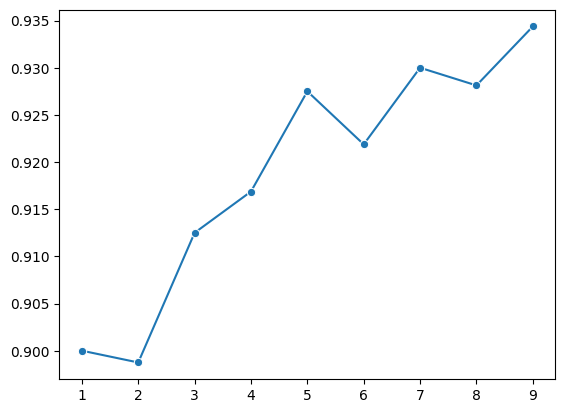

In [38]:
k_values = [i for i in range(1,10)]
scores = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X_train, y_train, cv=5)
  scores.append(np.mean(score))
  if(scores[-1] >= max(scores)):
    k_best = k

print(k_best)
sns.lineplot(x=k_values,y=scores, marker ='o')

In [39]:
knn = KNeighborsClassifier(n_neighbors=k_best).fit(X_train, y_train)

In [40]:
y_predknn = knn.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_predknn)
precision = precision_score(y_test, y_predknn, labels=y.cat.categories, average='macro')
recall = recall_score(y_test, y_predknn, labels=y.cat.categories, average='macro')
print(f"Acurácia: {accuracy}\nPrecisão: {precision}\nRecall: {recall}")

Acurácia: 0.92
Precisão: 0.9192000450045004
Recall: 0.9184582188003168


## PFIs + PDPs

### rf

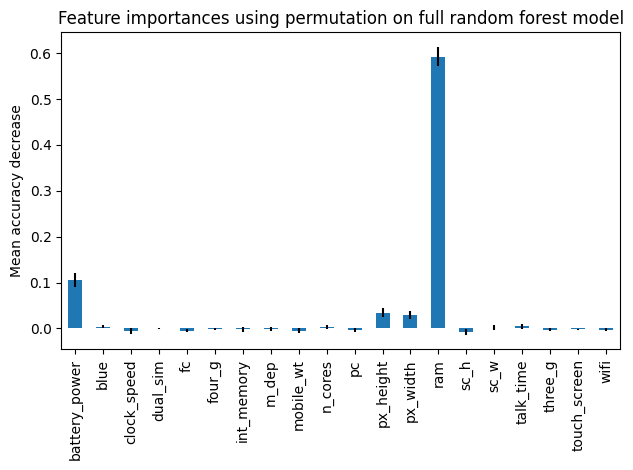

In [42]:
fresult = permutation_importance(rforest, X_test, y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(fresult.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=fresult.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full random forest model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# [0, 6, 7]
pdp.from_estimator(rforest, X_train, [0, 6, 7])

###mlp

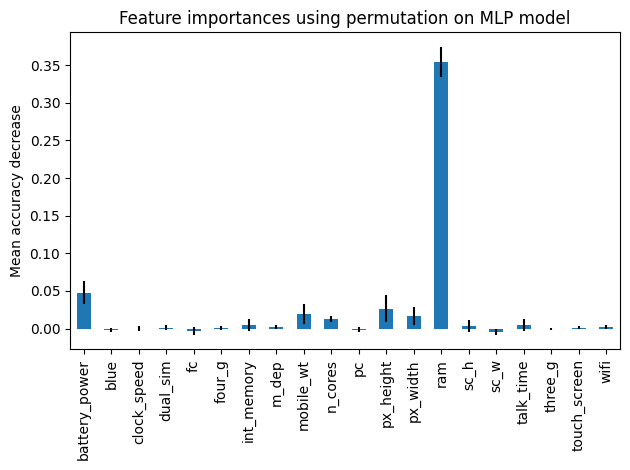

In [44]:
mlpresult = permutation_importance(mlp, X_test, y_test,n_repeats=30, random_state=0)

mlp_importances = pd.Series(mlpresult.importances_mean, index=X.columns)

fig, ax = plt.subplots()

mlp_importances.plot.bar(yerr=mlpresult.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on MLP model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# [4, 5, 7]
pdp.from_estimator(mlp, X_train, [4, 5, 7])

### knn

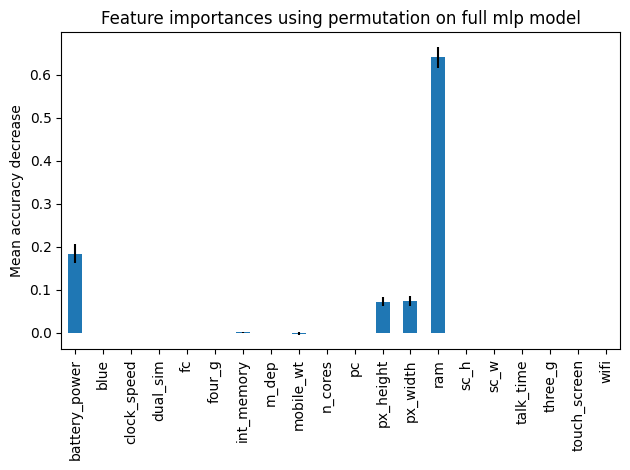

In [45]:
knnresult = permutation_importance(knn, X_test, y_test,n_repeats=30, random_state=0)

knn_importances = pd.Series(knnresult.importances_mean, index=X.columns)

fig, ax = plt.subplots()

knn_importances.plot.bar(yerr=knnresult.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full mlp model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
pdp.from_estimator(knn, X_train, [6, 11, 12], grid_resolution=20)